In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
consumption=['CLCCB','NGCCB','PACCB','EMCCB','GECCB','HYCCB','SOCCB','WDCCB','WSCCB','ESCCB','LOCCB','SFCCB','WYCCB','CLICB','NGICB','PAICB','EMICB','EMLCB','GEICB','HYICB','SOICB','WDICB','WSICB','ESICB','LOICB','SFINB','WYICB','CLRCB','NGRCB','PARCB','GERCB','SORCB','WDRCB','ESRCB','LORCB','CLACB','NGACB','PAACB','EMACB','ESACB','LOACB','TEACB','TECCB','TEICB','TERCB'
]
production=['HYCCB','GEEGB','HYEGB','SOEGB','WYEGB','HYICB','ENPRP','HYTXB']
total=consumption+production+['ELEXB','ELIMB']
state=['AZ','NM','CA','TX']
x=range(1960,2010)
t=range(50)
path='C:\\Python27\\Scripts\\MCM\\'

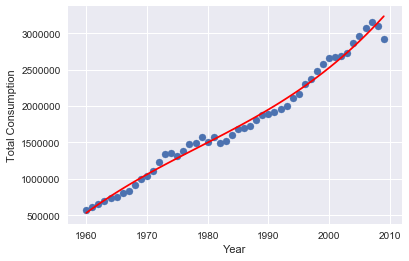

[  1.76428245e+01  -9.83238518e+02   6.09701385e+04   5.32325938e+05]


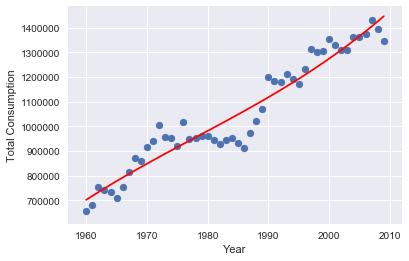

[  2.78794208e+00  -1.50552452e+02   1.58721846e+04   7.01953537e+05]


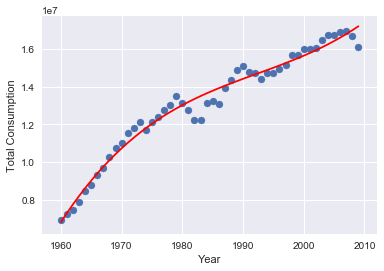

[  1.21045780e+02  -1.17352806e+04   4.96219825e+05   6.81401757e+06]


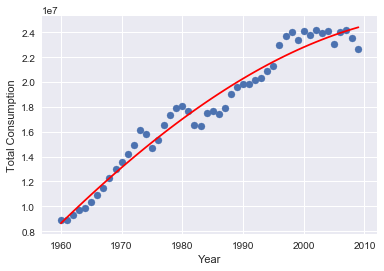

[ -1.18826467e+01  -2.54559324e+03   4.75273093e+05   8.63657152e+06]


In [40]:
result=[]
for s in state:
    df=pd.read_csv('C:\\Python27\\Scripts\\MCM\\'+s+'.csv')
    y=[]
    for year in range(1960,2010):
        y.append(sum(df[(df.MSN.isin(consumption))&(df.Year==year)].Data))
    result.append(y)
t=range(50)
for i in range(len(result)):
    y=result[i]
    z= np.polyfit(t, y, 3)
    p= np.poly1d(z)
    
    plt.plot(x,p(t),color='red')
    plt.scatter(x,y)
    plt.xlabel('Year')
    plt.ylabel('Total Consumption')
    plt.show()
    print (z)

In [3]:
from scipy.optimize import curve_fit

#用指数形式来拟合
y = result[0]
def func(x,a,b):
    return a/(1+(a/result[1][0]-1)*np.exp(-b*x))
popt,pcov = curve_fit(func, t, y)
a=popt[0]
b=popt[1]
yy=[]
for tt in t:
    yy.append(func(tt,a,b))
plot1=plt.plot(x, y, '*',label='original values')
plot2=plt.plot(x, yy, 'r',label='curve_fit values')
plt.legend()
plt.title('curve_fit')
plt.show()



NameError: name 'result' is not defined

## AZ

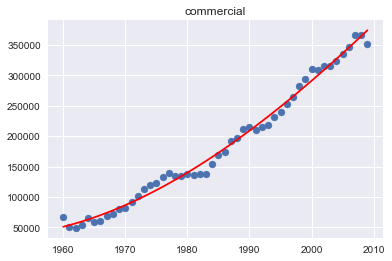

[ -3.99801726e-01   1.01570583e+02   2.58152096e+03   5.09023695e+04]


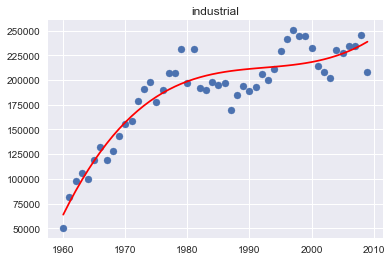

[  3.86407868e+00  -3.75983310e+02   1.27142644e+04   6.38347201e+04]


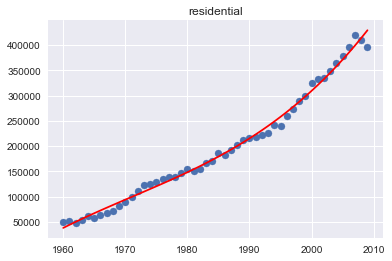

[  2.41103594e+00  -8.09685207e+01   6.16759475e+03   3.78569093e+04]


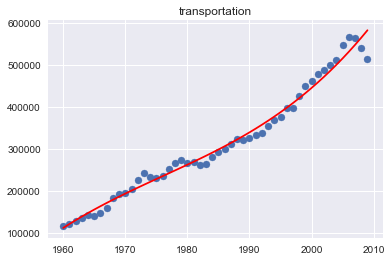

[  3.47481995e+00  -1.68283590e+02   9.49213632e+03   1.12261306e+05]


In [42]:
df=pd.read_csv(path+'AZ.csv')
sectordict={'commercial':['CLCCB','NGCCB','PACCB','EMCCB','GECCB','HYCCB','WDCCB','ESCCB','LOCCB','SFCCB'],
         'industrial':['CLICB','NGICB','PAICB','EMICB','EMLCB','GEICB','WDICB','WSICB','ESICB','LOICB','SFINB'],
         'residential':['SFRCB','GERCB','WDRCB','CLRCB','NGRCB','PARCB','ESRCB','LORCB'],
         'transportation':['CLACB','NGACB','PAACB','EMACB','ESACB','LOACB']}
sectory={}
for k,v in sectordict.items():
    sectory[k]=[]
    for i in range(1960,2010):
        sectory[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
for k,v in sectory.items():
    plt.scatter(x,v)
    z= np.polyfit(t,v, 3)
    p= np.poly1d(z)
    plt.plot(x,p(t),color='red')
    plt.title(k)
    plt.show()
    print (z)

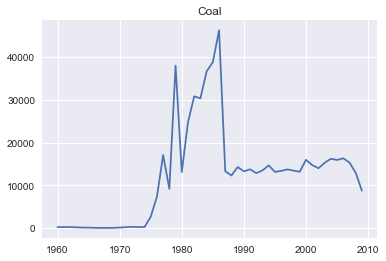

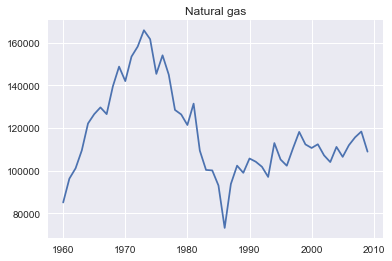

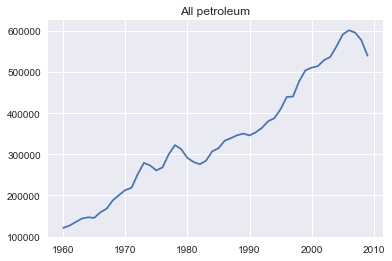

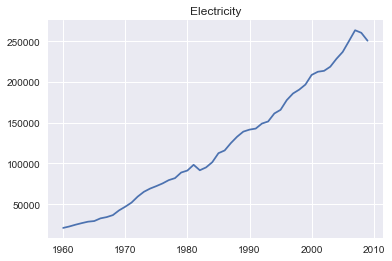

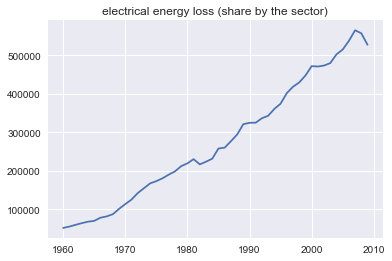

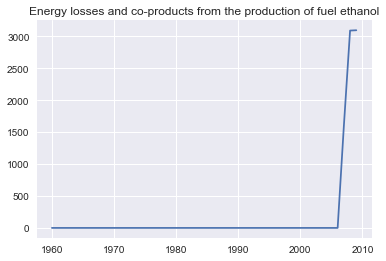

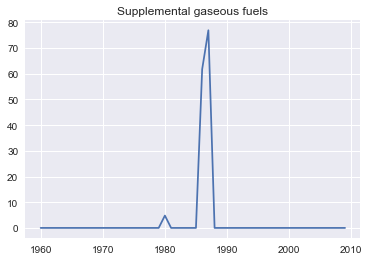

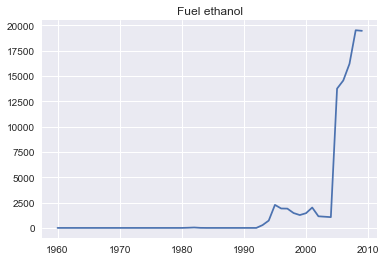

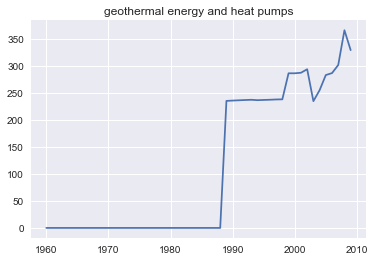

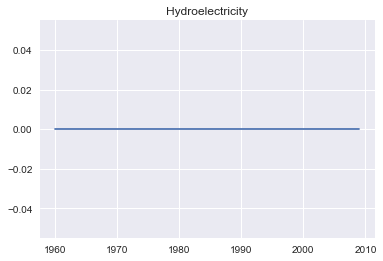

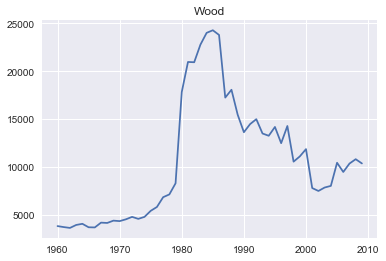

In [44]:
#按种类细分consumption
df=pd.read_csv(path+'AZ.csv')
sectordict={'Coal':['CLCCBC','CLICB','CLRCB','CLACB'], 
'Natural gas':['NGCCB','NGICB','NGRCB','NGACB'],
'All petroleum':['PACCB','PAICB','PARCB','PAACB'],
'Electricity':['ESCCB','ESICB','ESRCB','ESACB'],
'electrical energy loss (share by the sector)':['LOCCB','LOICB','LORCB','LOACB'],
'Energy losses and co-products from the production of fuel ethanol':['EMLCB'],
'Supplemental gaseous fuels':['SFCCB','SFINB','SFRCB'],
'Fuel ethanol':['EMCCB','EMICB','EMACB'],
'geothermal energy and heat pumps':['GECCB','GEICB','GERCB'],
'Hydroelectricity':['HYCCB'],
'Wood':['WDCCB','WDICB','WDRCB']
}

y={}
for k,v in sectordict.items():
    y[k]=[]
    for i in range(1960,2010):
        y[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
for k,v in y.items():
    plt.plot(x,v)
    plt.title(k)
    plt.show()

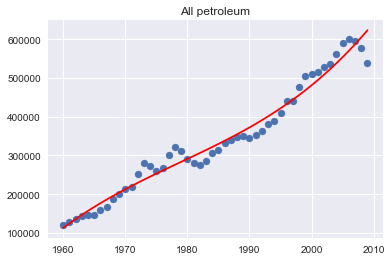

[  4.11248965e+00  -2.31833026e+02   1.19063771e+04   1.12721317e+05]


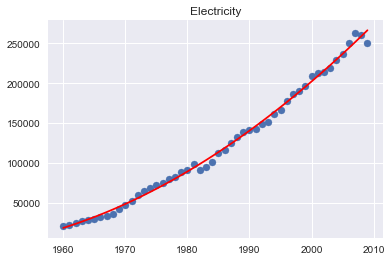

[ -2.59679429e-02   5.41751947e+01   2.45897127e+03   1.87088690e+04]


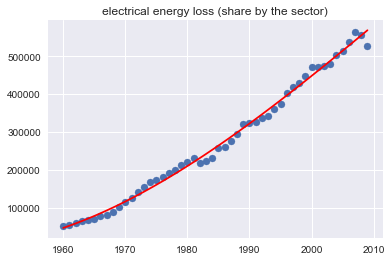

[ -8.61936351e-01   1.45156066e+02   5.60653942e+03   4.64844421e+04]


In [48]:
#只做 All petroleum Eletricty electricalloss的拟合
sectordict={'All petroleum':['PACCB','PAICB','PARCB','PAACB'],'Electricity':['ESCCB','ESICB','ESRCB','ESACB'],'electrical energy loss (share by the sector)':['LOCCB','LOICB','LORCB','LOACB']
}
y={}
for k,v in sectordict.items():
    y[k]=[]
    for i in range(1960,2010):
        y[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
for k,v in y.items():
    plt.scatter(x,v)
    z= np.polyfit(t,v, 3)
    p= np.poly1d(z)
    plt.plot(x,p(t),color='red')
    plt.title(k)
    plt.show()
    print (z)

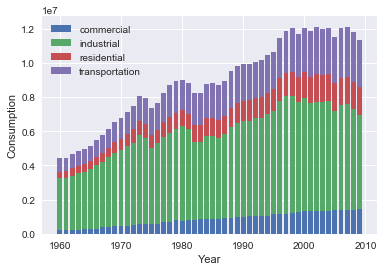

In [8]:
ind = np.arange(1960,2010)
sectordict={'commercial':['CLCCB','NGCCB','PACCB','EMCCB','GECCB','HYCCB','WDCCB','ESCCB','LOCCB','SFCCB'],
         'industrial':['CLICB','NGICB','PAICB','EMICB','EMLCB','GEICB','WDICB','WSICB','ESICB','LOICB','SFINB'],
         'residential':['SFRCB','GERCB','WDRCB','CLRCB','NGRCB','PARCB','ESRCB','LORCB'],
         'transportation':['CLACB','NGACB','PAACB','EMACB','ESACB','LOACB']}
sectory={}
for k,v in sectordict.items():
    sectory[k]=[]
    for i in range(1960,2010):
        sectory[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
        
        
data = sectory.values()
bottom = np.zeros(50)
for elem in data:
    plt.bar(ind, elem,bottom=bottom)
    bottom += elem
plt.legend( ('commercial', 'industrial','residential','transportation'))
plt.xlabel('Year')
plt.ylabel('Consumption')

In [6]:
'df=pd.read_csv(path+'AZ.csv')

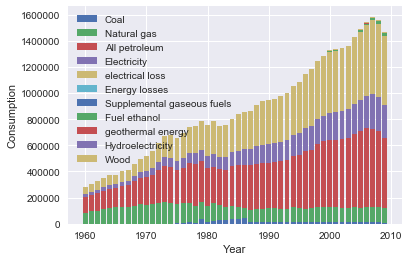

In [7]:

sectordict={'Coal':['CLCCBC','CLICB','CLRCB','CLACB'], 
'Natural gas':['NGCCB','NGICB','NGRCB','NGACB'],
'All petroleum':['PACCB','PAICB','PARCB','PAACB'],
'Electricity':['ESCCB','ESICB','ESRCB','ESACB'],
'electrical loss':['LOCCB','LOICB','LORCB','LOACB'],
'Energy losses':['EMLCB'],
'Supplemental gaseous fuels':['SFCCB','SFINB','SFRCB'],
'Fuel ethanol':['EMCCB','EMICB','EMACB'],
'geothermal energy':['GECCB','GEICB','GERCB'],
'Hydroelectricity':['HYCCB'],
'Wood':['WDCCB','WDICB','WDRCB']}
ind = np.arange(1960,2010)
y={}
for k,v in sectordict.items():
    y[k]=[]
    for i in range(1960,2010):
        y[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
data = y.values()
bottom = np.zeros(50)


for elem in data:
    plt.bar(ind, elem,bottom=bottom)
    bottom += elem
plt.legend(sectordict.keys())
plt.xlabel('Year')
plt.ylabel('Consumption')

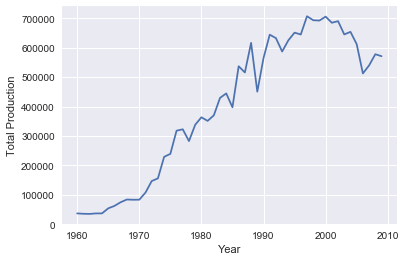

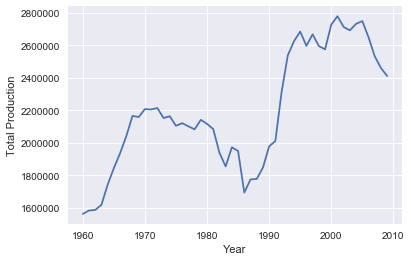

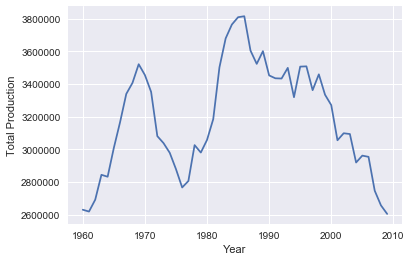

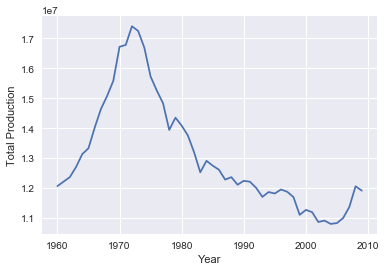

In [6]:
for s in state:
    df=pd.read_csv(path+s+'.csv')
    x=range(1960,2010)
    y=df[df.MSN=='TEPRB'].Data.values
    plt.plot(x,y)
    plt.xlabel('Year')
    plt.ylabel('Total Production')
    plt.show()

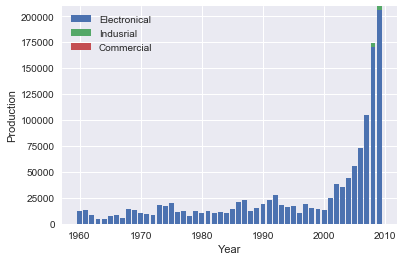

In [12]:
df=pd.read_csv(path+'TX.csv')
proclass={
    'Electronical':['GEEGB','HYEGB','SOEGB','WYEGB'],
    'Indusrial':['HYICB','ENPRP'],
    'Commercial':['HYCCB']
}
ind = np.arange(1960,2010)
proclassy={}
for k,v in proclass.items():
    proclassy[k]=[]
    for i in range(1960,2010):
        proclassy[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
        
        
data = proclassy.values()
bottom = np.zeros(50)
for elem in data:
    plt.bar(ind, elem,bottom=bottom)
    bottom += elem
plt.legend(proclass.keys(),loc='upper left')
#plt.legend(proclass.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Production')

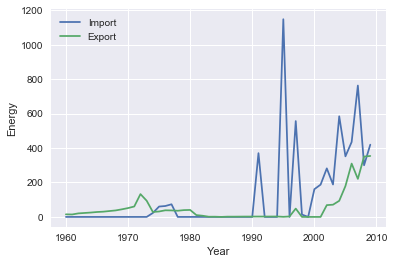

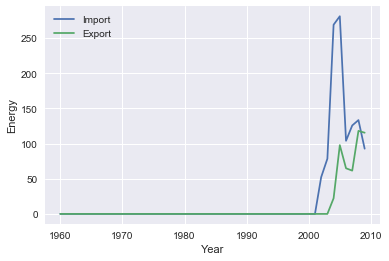

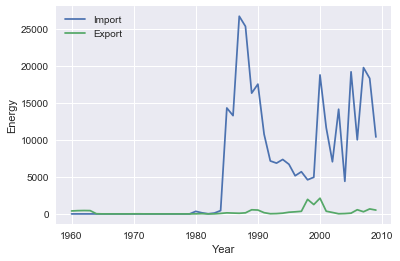

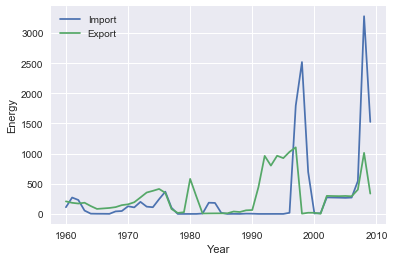

In [6]:
##import export
for s in state:
    df=pd.read_csv('C:\\Python27\\Scripts\\MCM\\'+s+'.csv')
    y=[]
    yy=[]
    for i in range(1960,2010):
        y.append(sum(df[(df.MSN=='ELIMB')&(df.Year==i)].Data))
        yy.append(sum(df[(df.MSN=='ELEXP')&(df.Year==i)].Data))
    plt.plot(x,y,label='Import')
    plt.plot(x,yy,label='Export')
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Energy')
    plt.show()
    